## Toxic: EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

In [2]:
df = pd.read_pickle('../data/toxictrain.pkl')
print(df.shape)
df.head()

(159571, 18)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,rating,comment_text_s,comment_text_f,token_clean,sent_token,polarity_sentence,polarity_comment,polarity_comment_s,word_count,polarity_mean
idx,,,,,,,,,,,,,,,,,,
3a4c7758fad18de3,3a4c7758fad18de3,", I hope your retarded kids get anal raped and...",1,1,1,1,1,1,6,", I hope your retarded kids get anal raped and...",", hope retarded kids get anal raped murdered h...","[i, hope, your, retarded, kids, get, anal, rap...","[, I hope your retarded kids get anal raped an...","(-0.6, 1.0, -0.018750000000000003, [-0.4, -0.4...",0.00,0.00,94,-0.018750
24d2b50726b67167,24d2b50726b67167,I am going to murder ZimZalaBim ST47 for being...,1,1,1,1,1,1,6,I am going to murder ZimZalaBim ST47 for being...,", hope retarded kids get anal raped murdered h...","[i, am, going, to, murder, zimzalabim, st47, f...",[I am going to murder ZimZalaBim ST47 for bein...,"(-1.0, -1.0, -1.0, [-1.0])",0.00,0.00,12,-1.000000
c586b7a2fd575b13,c586b7a2fd575b13,"Shut up you asswipe, we don't care. I'll decap...",1,1,1,1,1,1,6,"Shut up you asswipe, we don't care. I'll decap...",", hope retarded kids get anal raped murdered h...","[shut, up, you, asswipe, we, dont, care, ill, ...","[Shut up you asswipe, we don't care., I'll dec...","(-0.2, 0.0, -0.07555555555555557, [0.0, -0.177...",-0.25,-0.25,24,-0.075556
77d84b1321c22d9a,77d84b1321c22d9a,"LGBT \n\nyou little fuck , are you a fag , tha...",1,1,1,1,1,1,6,"LGBT \n\nyou little fuck , are you a fag , tha...",", hope retarded kids get anal raped murdered h...","[lgbt, you, little, fuck, are, you, a, fag, th...","[LGBT \n\nyou little fuck , are you a fag , th...","(-0.17750000000000005, 0.0, -0.088750000000000...",0.00,0.00,56,-0.088750
1368c10281978876,1368c10281978876,"You're a stupid cunt \n\nFuck you dumb arse, y...",1,1,1,1,1,1,6,"You're a stupid cunt \n\nFuck you dumb arse, y...",", hope retarded kids get anal raped murdered h...","[youre, a, stupid, cunt, fuck, you, dumb, arse...","[You're a stupid cunt \n\nFuck you dumb arse, ...","(-0.41250000000000003, -0.41250000000000003, -...",0.00,0.00,59,-0.412500


In [3]:
df.sum(axis=0,numeric_only=True)

toxic                 1.529400e+04
severe_toxic          1.595000e+03
obscene               8.449000e+03
threat                4.780000e+02
insult                7.877000e+03
identity_hate         1.405000e+03
rating                3.509800e+04
polarity_comment      2.065111e+03
polarity_comment_s    1.258522e+03
word_count            1.055252e+07
polarity_mean         7.919310e+03
dtype: float64

In [4]:
df_t = df[df['rating']>0]
df_nt = df[df['rating']==0]
print(df_t.shape, df_nt.shape)

(16225, 18) (143346, 18)


In [5]:
df.corr().sort_values('rating')

,toxic,severe_toxic,obscene,threat,insult,identity_hate,rating,polarity_comment,polarity_comment_s,word_count,polarity_mean
polarity_mean,-0.258751,-0.146693,-0.234027,-0.052753,-0.240529,-0.065718,-0.273029,0.035337,0.032760,0.050364,1.000000
word_count,-0.051195,0.009264,-0.041045,-0.006251,-0.042430,-0.013947,-0.045675,0.049923,0.009960,1.000000,0.050364
polarity_comment,-0.012304,-0.005172,-0.009030,-0.000735,-0.010607,-0.005022,-0.011982,1.000000,0.756902,0.049923,0.035337
polarity_comment_s,-0.007503,-0.003415,-0.005456,-0.000303,-0.006395,-0.003670,-0.007370,0.756902,1.000000,0.009960,0.032760
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,0.251314,-0.000735,-0.000303,-0.006251,-0.052753
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,0.448341,-0.005022,-0.003670,-0.013947,-0.065718
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.517967,-0.005172,-0.003415,0.009264,-0.146693
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,0.869050,-0.012304,-0.007503,-0.051195,-0.258751
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,0.869177,-0.010607,-0.006395,-0.042430,-0.240529
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,0.879731,-0.009030,-0.005456,-0.041045,-0.234027


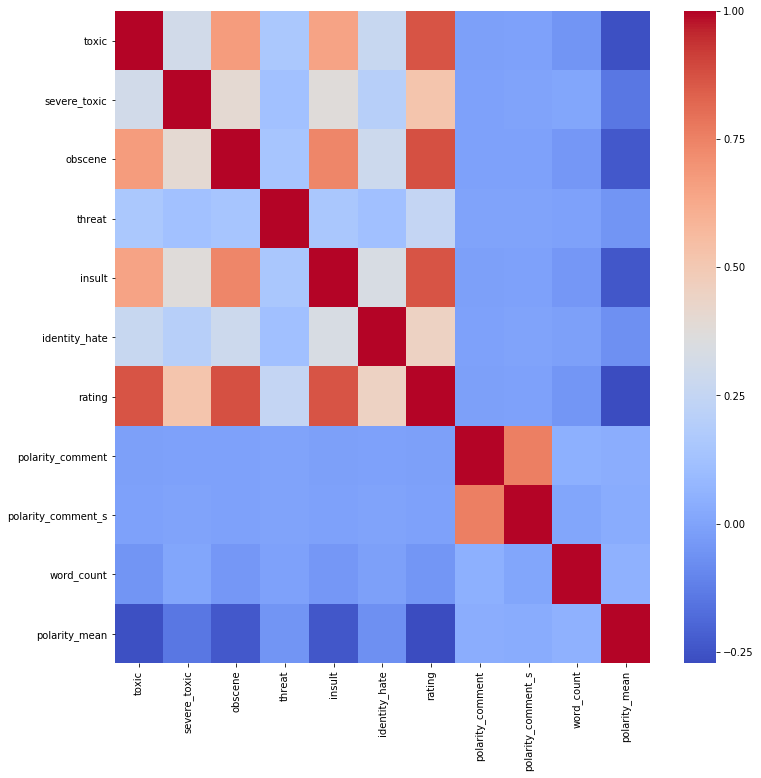

In [6]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), cmap = 'coolwarm')
# sns.heatmap(df.corr(), cmap = "Greens" )
plt.savefig('../charts/allheatmap.png')

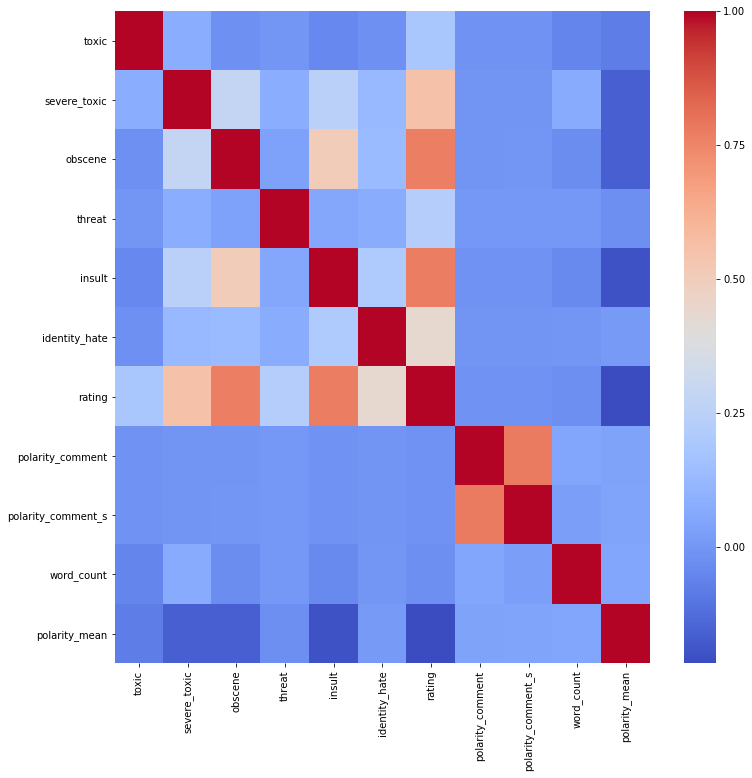

In [7]:
plt.figure(figsize = (12,12))
sns.heatmap(df_t.corr(), cmap = 'coolwarm')
# sns.heatmap(df.corr(), cmap = "Greens" )
plt.savefig('../charts/toxicheatmap.png')

In [8]:
# df_t.cd = cd.sort_values(['pledged_total'],ascending=[False])
df_t.groupby('rating').sum()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,polarity_comment,polarity_comment_s,word_count,polarity_mean
rating,,,,,,,,,,
1,5666,0,317,22,301,54,62.585898,44.747396,381575,-168.390261
2,3263,41,1944,118,1427,167,18.745143,9.927939,151427,-286.643160
3,4189,186,4024,47,3984,197,28.664136,23.254761,176647,-535.651912
4,1760,1008,1748,140,1749,635,2.605469,2.250000,109470,-310.745380
5,385,329,385,120,385,321,4.768338,4.812500,23673,-66.463044
6,31,31,31,31,31,31,0.687500,-0.250000,2416,-6.402201


In [9]:
df_t.groupby(['toxic','severe_toxic','obscene','insult','identity_hate','threat']).sum()

rating  \
toxic severe_toxic obscene insult identity_hate threat           
0     0            0       0      0             1           22   
                                  1             0           54   
                           1      0             0          301   
                                                1            6   
                                  1             0           56   
                   1       0      0             0          317   
                                                1            4   
                                  1             0            6   
                           1      0             0          362   
                                                1            6   
                                  1             0           54   
1     0            0       0      0             0         5666   
                                                1          226   
                                  1             0          272   
                                                1           21   
                           1      0             0         2430   
                                                1           48   
                                  1             0          402   
                                                1           12   
                   1       0      0             0         3516   
                                                1           33   
                                  1             0          105   
                           1      0             0        11400   
                                                1          524   
                                  1             0         2472   
                                                1          280   
      1            0       0      0             0           82   
                                                1           33   
                                  1             0            9   
                                                1            4   
                           1      0             0           42   
                                                1            4   
                                  1             0           28   
                   1       0      0             0          474   
                                                1           16   
                                  1             0           24   
                           1      0             0         3956   
                                                1          320   
                                  1             0         1325   
                                                1          186   

                                                        polarity_comment  \
toxic severe_toxic obscene insult identity_hate threat                     
0     0            0       0      0             1               0.000000   
                                  1             0              -0.367188   
                           1      0             0               4.800000   
                                                1               0.000000   
                                  1             0               0.800000   
                   1       0      0             0               8.359375   
                                                1               0.000000   
                                  1             0               0.000000   
                           1      0             0              -0.640869   
                                                1               0.000000   
                                  1             0               0.000000   
1     0            0       0      0             0              49.793710   
                                                1               0.750000   
                                  1             0              -0.250000   
                                                1               0.0

In [10]:
# fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=2)
# ax = plt.subplot(221)
# ax = sns.barplot(x="country",y="count",data=df,palette='rainbow')
# ax.set_xlabel("Country",fontweight='bold')
# ax.set_ylabel("Number of Projects",fontweight='bold')
# plt.xticks(rotation=90)
# plt.title("Kickstarter # Projects by Country",fontweight='bold',fontsize=15)

In [11]:
rating_dict = {}
ratings_list = [0,1,2,3,4,5,6,'All']
for rating in ratings_list:
    if rating == 'All':
        df_c = df
    else:
        df_c = df[df['rating'] == rating]
    df_c = df_c.dropna()
    words_mean = df_c['word_count'].mean()
    polarity_mean = df_c['polarity_comment'].mean()
    
    item_count = df_c['id'].count()
    words_total = df_c['word_count'].sum()
    
    rating_dict[rating] = {"item_count":item_count,"words_mean":words_mean, "polarity_mean":polarity_mean,"words_total":words_total}

In [12]:
scd = pd.DataFrame(rating_dict).T
scd = pd.DataFrame(scd)
scd['rating'] = scd.index
# scd = scd.sort_values(['rating'],ascending=[False])
scd

,item_count,polarity_mean,words_mean,words_total,rating
0,143346.0,0.013583,67.719462,9707314.0,0
1,6360.0,0.009841,59.996069,381575.0,1
2,3480.0,0.005387,43.513506,151427.0,2
3,4209.0,0.006810,41.968876,176647.0,3
4,1760.0,0.001480,62.198864,109470.0,4
5,385.0,0.012385,61.488312,23673.0,5
6,31.0,0.022177,77.935484,2416.0,6
All,159571.0,0.012942,66.130575,10552522.0,All


In [13]:
clean_dict = {}
clean_list = [('Not Toxic',0),('Toxic',1),('All','All')]
for item in clean_list:
    if item[0] == 'All':
        df_c = df
    elif item[0] == 'Not Toxic':
        df_c = df[df['rating'] == 0]
    else:
        df_c = df[df['rating'] > 0]        
    df_c = df_c.dropna()
    words_mean = df_c['word_count'].mean()
    polarity_mean = df_c['polarity_comment'].mean()

    item_count = df_c['id'].count()
    words_total = df_c['word_count'].sum()
    
    clean_dict[item] = {"item_count":item_count,"words_mean":words_mean, "polarity_mean":polarity_mean,"words_total":words_total}

In [14]:
scd = pd.DataFrame(clean_dict).T
scd = pd.DataFrame(scd)
# scd['rating'] = scd.index
# scd = scd.sort_values(['rating'],ascending=[False])
scd

,,item_count,polarity_mean,words_mean,words_total
All,All,159571.0,0.012942,66.130575,10552522.0
Not Toxic,0,143346.0,0.013583,67.719462,9707314.0
Toxic,1,16225.0,0.007276,52.092943,845208.0


In [15]:
# toxic_dict = {}
# toxic_list = [('Not Toxic',0),('Toxic',1),('All','All')]

# for item in toxic_list:
#     if item[0] == 'All':
#         df_c = df
#     elif item[0]==1:
#         df_c = df[df['rating'] > 0]
#     else:
#         df_c = df[df['rating'] = 0]
#     df_c = df_c.dropna()
#     state_mean = df_c['state'].mean()
#     backers_mean = df_c['backers_count'].mean()
#     pledged_mean = df_c['usd_pledged'].mean()
#     goal_mean = df_c['usd_goal'].mean()
#     campaign_mean = df_c['campaign_length'].mean()
#     staff_pick_mean = df_c['staff_pick'].mean()
#     blurb_mean = df_c['blurb_length'].mean()
    
#     state_total = df_c['state'].sum()
#     backers_total = df_c['backers_count'].sum()
#     pledged_total = df_c['usd_pledged'].sum()
#     goal_total = df_c['usd_goal'].sum()
#     pct_goal_achieved = pledged_total/goal_total
    
#     state_dict[state[0]] = {"state_mean":state_mean, "backers_mean": backers_mean, "pledged_mean":pledged_mean, 
#                          "goal_mean":goal_mean, "campaign_mean":campaign_mean, "staff_pick_mean":staff_pick_mean, 
#                          "blurb_mean":blurb_mean, "state_total": state_total, "backers_total":backers_total,
#                             "pledged_total":pledged_total,"goal_total":goal_total,"pct_goal_achieved": pct_goal_achieved}

In [16]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'rating', 'comment_text_s', 'comment_text_f',
       'token_clean', 'sent_token', 'polarity_sentence', 'polarity_comment',
       'polarity_comment_s', 'word_count', 'polarity_mean'],
      dtype='object')

In [17]:
class_dict = {}
class_list = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate','clean','All']
for item in class_list:
    if item == 'All':
        df_c = df
    elif item == 'clean':
        df_c = df[df['rating']==0] 
    else:
        df_c = df[df[item]==1]        
    df_c = df_c.dropna()
    words_mean = df_c['word_count'].mean()
    polarity_mean = df_c['polarity_comment'].mean()

    item_count = df_c['id'].count()
    words_total = df_c['word_count'].sum()
    
    class_dict[item] = {"item_count":item_count,"words_mean":words_mean, "polarity_mean":polarity_mean,
                        "words_total":words_total}

scd = pd.DataFrame(class_dict).T
scd = pd.DataFrame(scd)
scd = scd.sort_values(['item_count'],ascending=[False])
scd

,item_count,polarity_mean,words_mean,words_total
All,159571.0,0.012942,66.130575,10552522.0
clean,143346.0,0.013583,67.719462,9707314.0
toxic,15294.0,0.006872,50.677848,775067.0
obscene,8449.0,0.006808,49.071606,414606.0
insult,7877.0,0.005466,47.832043,376773.0
severe_toxic,1595.0,0.004675,75.191223,119930.0
identity_hate,1405.0,0.004385,51.588612,72482.0
threat,478.0,0.010787,54.922594,26253.0


In [ ]:
df_t0 = df_t[df_t['toxic']==0]
df_t0.sum(axis=0,numeric_only=True)

In [ ]:
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=2)
ax = plt.subplot(221)
df_c = pd.DataFrame(scd)
df_c['class'] = df_c.index
ax = sns.barplot(x="class",y="item_count",data=df_c,palette='rainbow')
ax.set_xlabel("Class",fontweight='bold')
ax.set_ylabel("Number of Commnts",fontweight='bold')
plt.xticks(rotation=90)
plt.title("Comments by Class",fontweight='bold',fontsize=15)

In [ ]:
# word_count_dict = {}

# for row in df.comment_text:
    
# word_count = TextBlob(df_t.comment_text)

In [ ]:
from nltk.util import ngrams

from collections import Counter
from operator import itemgetter

from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"']
stop = set(stop)

counter = Counter()

n = 2
for doc in df.comment_text_s:
    words = TextBlob(doc).words
    words = [w for w in words if w not in stop]
    bigrams = ngrams(words, n)
    counter += Counter(bigrams)

for phrase, count in counter.most_common(30):
    print('%20s %i' % (" ".join(phrase), count))

In [ ]:
# https://github.com/JasonKessler/scattertext#installation
import scattertext as st
import spacy
from pprint import pprint